# Importación de librerías

In [0]:
#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Función para evaluación de modelos
import functions


In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

In [0]:
data_pulsar.head()

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Análisis de Algoritmos con Data Cruda

In [5]:
from sklearn.model_selection import train_test_split

#Partición de la data cruda
X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

print("Partición de la data")
print()
print("Data:",X.shape)
print("Data de entrenamiento-validación:",X_trainval.shape)
print("Data de entrenamiento:",X_train.shape)
print("Data de validación:",X_val.shape)

Partición de la data

Data: (17898, 8)
Data de entrenamiento-validación: (15213, 8)
Data de entrenamiento: (12170, 8)
Data de validación: (3043, 8)


## **1° Algoritmo: Random Forest**

Se realiza la evaluación de la data cruda aplicando el algoritmo Random Forest.

El MSE para el modelo RandomForestClassifier es:  0.02201774564574433
El accuracy para el modelo RandomForestClassifier es:  0.9779822543542557
La precisión para el modelo RandomForestClassifier es:  0.9344262295081968
El recall para el modelo RandomForestClassifier es:  0.8172043010752689
El F1-score para el modelo RandomForestClassifier es:  0.8718929254302105


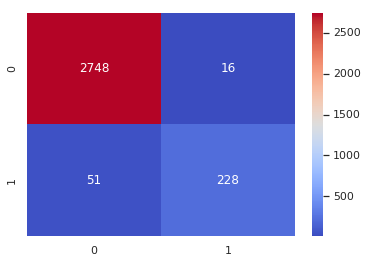

In [0]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model.fit(X_train, y_train)

functions.eval_model(RF_model, X_val, y_val)

### **Aplicando GridSearchCV**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

RF_grid_param = {  
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3]
}

In [0]:

RF_gd = GridSearchCV(estimator=RF_model,  
                     param_grid=RF_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

RF_gd.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion

In [0]:
print ("Mejores parámetros obtenidos:")
print (RF_gd.best_params_)

Mejores parámetros obtenidos:
{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}


Se evalúa la data luego de aplicar GridSearchCV

El MSE para el modelo RandomForestClassifier es:  0.020046007229707525
El accuracy para el modelo RandomForestClassifier es:  0.9799539927702925
La precisión para el modelo RandomForestClassifier es:  0.9291338582677166
El recall para el modelo RandomForestClassifier es:  0.8458781362007168
El F1-score para el modelo RandomForestClassifier es:  0.8855534709193245


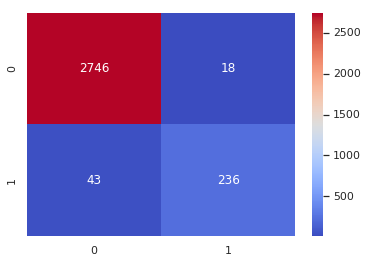

In [0]:
functions.eval_model(RF_gd.best_estimator_, X_val, y_val)

## 2° Algoritmo: SVM

Se realiza la evaluación de la data cruda aplicando el algoritmo Support Vector Machine (SVM).

El MSE para el modelo SVC es:  0.09069996713769307
El accuracy para el modelo SVC es:  0.909300032862307
La precisión para el modelo SVC es:  1.0
El recall para el modelo SVC es:  0.010752688172043012
El F1-score para el modelo SVC es:  0.021276595744680854


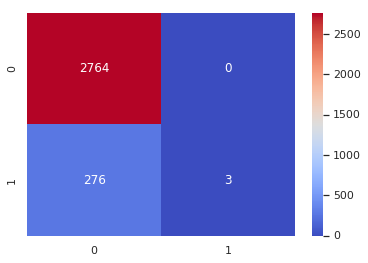

In [0]:
from sklearn.svm import SVC

SVM_model = SVC(gamma='auto',kernel='rbf')
SVM_model.fit(X_train, y_train) 

functions.eval_model(SVM_model, X_val, y_val)

### **Aplicando GridSearchCV**

In [0]:
SVM_grid_param = {  
    'C': [1, 10, 100],
    'gamma': ['auto',0.01, 0.0001],
    'kernel': ['rbf']
}

In [0]:
SVM_gd = GridSearchCV(estimator=SVM_model,  
                     param_grid=SVM_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
SVM_gd.fit(X_train, y_train)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 0.01, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [0]:
print ("Mejores parámetros obtenidos:")
print (SVM_gd.best_params_)

Mejores parámetros obtenidos:
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


Se evalúa la data luego de aplicar GridSearchCV

El MSE para el modelo SVC es:  0.017745645744331254
El accuracy para el modelo SVC es:  0.9822543542556688
La precisión para el modelo SVC es:  0.9482071713147411
El recall para el modelo SVC es:  0.8530465949820788
El F1-score para el modelo SVC es:  0.89811320754717


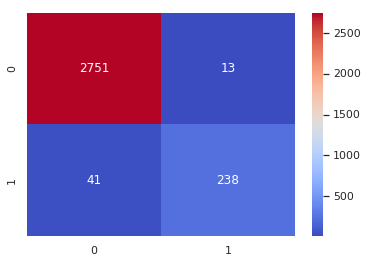

In [0]:
functions.eval_model(SVM_gd.best_estimator_, X_val, y_val)

## 3° Algoritmo: KNN

Se realiza la evaluación de la data cruda aplicando el algoritmo K-Nearest Neighbors (KNN).

El MSE para el modelo KNeighborsClassifier es:  0.026947091685836345
El accuracy para el modelo KNeighborsClassifier es:  0.9730529083141637
La precisión para el modelo KNeighborsClassifier es:  0.8924302788844621
El recall para el modelo KNeighborsClassifier es:  0.8028673835125448
El F1-score para el modelo KNeighborsClassifier es:  0.8452830188679245


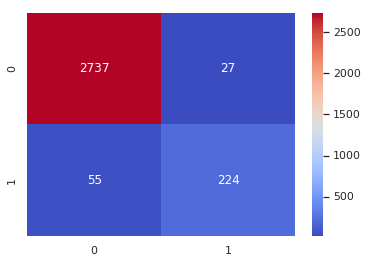

In [0]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train) 

functions.eval_model(KNN_model, X_val, y_val)

### **Aplicando GridSearchCV**

In [0]:
KNN_grid_param = {  
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance'],
    'p': [1,2]
}

KNN_gd_sr = GridSearchCV(estimator=KNN_model,  
                     param_grid=KNN_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
KNN_gd_sr.fit(X_train, y_train)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11, 19], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [0]:
print ("Mejores parámetros obtenidos:")
print (KNN_gd_sr.best_params_)

Mejores parámetros obtenidos:
{'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}


Se evalúa la data cruda luego de aplicar GridSearchCV

El MSE para el modelo KNeighborsClassifier es:  0.025303976339139007
El accuracy para el modelo KNeighborsClassifier es:  0.9746960236608609
La precisión para el modelo KNeighborsClassifier es:  0.9243697478991597
El recall para el modelo KNeighborsClassifier es:  0.7885304659498208
El F1-score para el modelo KNeighborsClassifier es:  0.8510638297872339


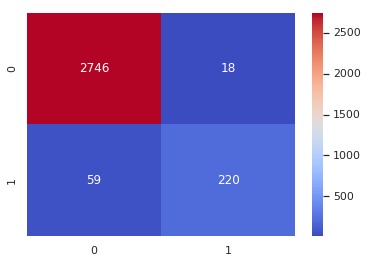

In [0]:
functions.eval_model(KNN_gd_sr.best_estimator_, X_val, y_val)

## 4° Algoritmo: Red Neuronal

Se realiza la evaluación de la data cruda aplicando el algoritmo Red Neuronal (ANN).

El MSE para el modelo MLPClassifier es:  0.020374630299046993
El accuracy para el modelo MLPClassifier es:  0.979625369700953
La precisión para el modelo MLPClassifier es:  0.9125475285171103
El recall para el modelo MLPClassifier es:  0.8602150537634409
El F1-score para el modelo MLPClassifier es:  0.885608856088561


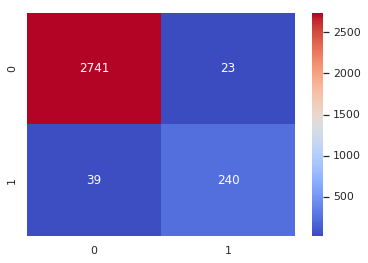

In [0]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()
NN_model.fit(X_train, y_train) 

functions.eval_model(NN_model, X_val, y_val)

### **Aplicando GridSearchCV**

In [0]:
NN_grid_param = {  
    'activation':['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam']
}

NN_gd_sr = GridSearchCV(estimator=NN_model,  
                     param_grid=NN_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

NN_gd_sr.fit(X_train, y_train)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tan

In [0]:
print ("Mejores parámetros obtenidos:")
print (NN_gd_sr.best_params_)

Mejores parámetros obtenidos:
{'activation': 'logistic', 'solver': 'adam'}


Se evalúa la data cruda luego de aplicar GridSearchCV

El MSE para el modelo MLPClassifier es:  0.0223463687150838
El accuracy para el modelo MLPClassifier es:  0.9776536312849162
La precisión para el modelo MLPClassifier es:  0.9105058365758755
El recall para el modelo MLPClassifier es:  0.8387096774193549
El F1-score para el modelo MLPClassifier es:  0.8731343283582089


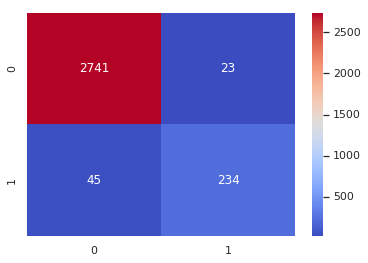

In [0]:
functions.eval_model(NN_gd_sr.best_estimator_, X_val, y_val)

# Análisis de algoritmos con Data Cruda y balanceada

## Aplicación de SVMSMOTE


Variante del algoritmo SMOTE que utiliza un algoritmo SVM para detectar la muestra que se usará para generar nuevas muestras sintéticas, utiliza un clasificador SVM para encontrar vectores de soporte y generar las muestras.

*Referencia: https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#imblearn.over_sampling.SVMSMOTE*

Aplicamos SVMSMOTE en el conjunto de entrenamiento.

In [0]:
#https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#r88acb9955f91-2
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
smt = SVMSMOTE(random_state=12)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
X_train_svmsmote = pd.DataFrame(X_resampled)
y_train_svmsmote = pd.Series(y_resampled)

## **1° Algoritmo: Random Forest**

Se realiza la evaluación de la data cruda y balanceada aplicando el algoritmo Random Forest.

El MSE para el modelo RandomForestClassifier es:  0.042392375944791325
El accuracy para el modelo RandomForestClassifier es:  0.9576076240552087
La precisión para el modelo RandomForestClassifier es:  0.7038043478260869
El recall para el modelo RandomForestClassifier es:  0.9283154121863799
El F1-score para el modelo RandomForestClassifier es:  0.8006182380216383


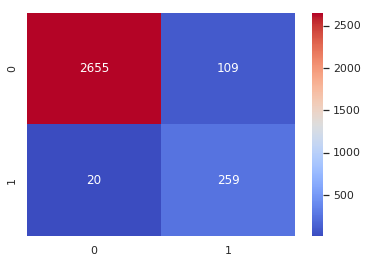

In [25]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model.fit(X_train_svmsmote, y_train_svmsmote)

functions.eval_model(RF_model, X_val, y_val)

### **Aplicando GridSearchCV**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

RF_grid_param = {  
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3]
}

RF_gd = GridSearchCV(estimator=RF_model,  
                     param_grid=RF_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

RF_gd.fit(X_train_svmsmote, y_train_svmsmote) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion

In [28]:
print ("Mejores parámetros obtenidos:")
print (RF_gd.best_params_)

Mejores parámetros obtenidos:
{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}


Se evalúa la data de validación luego de aplicar GridSearchCV

El MSE para el modelo RandomForestClassifier es:  0.04140650673677292
El accuracy para el modelo RandomForestClassifier es:  0.9585934932632271
La precisión para el modelo RandomForestClassifier es:  0.706199460916442
El recall para el modelo RandomForestClassifier es:  0.9390681003584229
El F1-score para el modelo RandomForestClassifier es:  0.8061538461538462


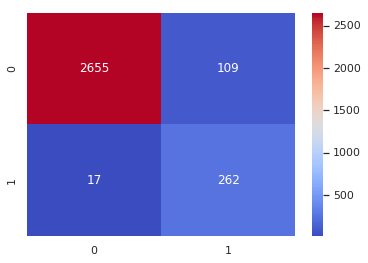

In [29]:
functions.eval_model(RF_gd.best_estimator_, X_val, y_val)

## **2° Algoritmo: SVM**

Se realiza la evaluación de la data cruda y balanceada aplicando el algoritmo Support Vector Machine (SVM).

El MSE para el modelo SVC es:  0.09004272099901413
El accuracy para el modelo SVC es:  0.9099572790009859
La precisión para el modelo SVC es:  0.5454545454545454
El recall para el modelo SVC es:  0.10752688172043011
El F1-score para el modelo SVC es:  0.17964071856287425


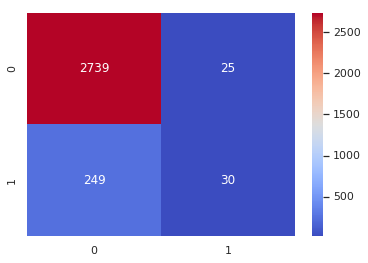

In [30]:
from sklearn.svm import SVC

SVM_model = SVC(gamma='auto',kernel='rbf')
SVM_model.fit(X_train_svmsmote, y_train_svmsmote) 

functions.eval_model(SVM_model, X_val, y_val)

### **Aplicando GridSearchCV**

In [32]:
SVM_grid_param = {  
    'C': [1, 10, 100],
    'gamma': ['auto',0.01, 0.0001],
    'kernel': ['rbf']
}

SVM_gd = GridSearchCV(estimator=SVM_model,  
                     param_grid=SVM_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
SVM_gd.fit(X_train_svmsmote, y_train_svmsmote)  


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 0.01, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [34]:
print ("Mejores parámetros obtenidos:", SVM_gd.best_params_)
print ()

Mejores parámetros obtenidos: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}



Se evalúa la data de validación luego de aplicar GridSearchCV

El MSE para el modelo SVC es:  0.03614853762734144
El accuracy para el modelo SVC es:  0.9638514623726585
La precisión para el modelo SVC es:  0.7964912280701755
El recall para el modelo SVC es:  0.8136200716845878
El F1-score para el modelo SVC es:  0.8049645390070922


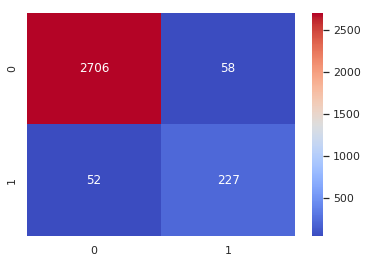

In [35]:
functions.eval_model(SVM_gd.best_estimator_, X_val, y_val)

## **3° Algoritmo: KNN**

Se realiza la evaluación de la data cruda ybalanceada aplicando el algoritmo K-Nearest Neighbors (KNN).

El MSE para el modelo KNeighborsClassifier es:  0.04732172198488334
El accuracy para el modelo KNeighborsClassifier es:  0.9526782780151166
La precisión para el modelo KNeighborsClassifier es:  0.6839237057220708
El recall para el modelo KNeighborsClassifier es:  0.899641577060932
El F1-score para el modelo KNeighborsClassifier es:  0.7770897832817337


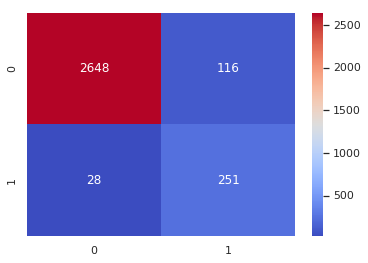

In [37]:
from sklearn.neighbors import KNeighborsClassifier 

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_svmsmote, y_train_svmsmote) 

functions.eval_model(KNN_model, X_val, y_val)

### **Aplicando GridSearchCV**

In [38]:
KNN_grid_param = {  
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance'],
    'p': [1,2]
}

KNN_gd_sr = GridSearchCV(estimator=KNN_model,  
                     param_grid=KNN_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
KNN_gd_sr.fit(X_train_svmsmote, y_train_svmsmote)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11, 19], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [39]:
print ("Mejores parámetros obtenidos:")
print (KNN_gd_sr.best_params_)

Mejores parámetros obtenidos:
{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


Se evalúa la data cruda luego de aplicar GridSearchCV

El MSE para el modelo KNeighborsClassifier es:  0.045349983568846536
El accuracy para el modelo KNeighborsClassifier es:  0.9546500164311534
La precisión para el modelo KNeighborsClassifier es:  0.6931506849315069
El recall para el modelo KNeighborsClassifier es:  0.9068100358422939
El F1-score para el modelo KNeighborsClassifier es:  0.7857142857142857


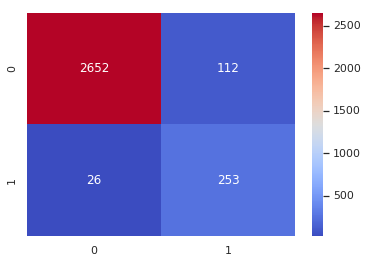

In [40]:
functions.eval_model(KNN_gd_sr.best_estimator_, X_val, y_val)

## 4° Algoritmo: ANN -Multi-layer Perceptron

Se realiza la evaluación de la data cruda y balanceada aplicando el algoritmo Red Neuronal (ANN).

El MSE para el modelo MLPClassifier es:  0.030890568517909958
El accuracy para el modelo MLPClassifier es:  0.9691094314820901
La precisión para el modelo MLPClassifier es:  0.7828746177370031
El recall para el modelo MLPClassifier es:  0.9175627240143369
El F1-score para el modelo MLPClassifier es:  0.8448844884488449


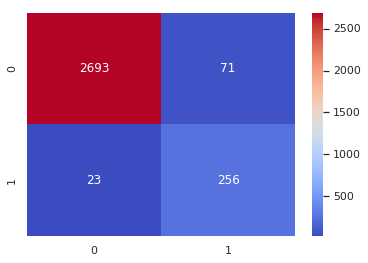

In [41]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()
NN_model.fit(X_train_svmsmote, y_train_svmsmote) 

functions.eval_model(NN_model, X_val, y_val)

### **Aplicando GridSearchCV**

In [42]:
NN_grid_param = {  
    'activation':['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam']
}

NN_gd_sr = GridSearchCV(estimator=NN_model,  
                     param_grid=NN_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

NN_gd_sr.fit(X_train_svmsmote, y_train_svmsmote)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tan

In [43]:
print ("Mejores parámetros obtenidos:")
print (NN_gd_sr.best_params_)

Mejores parámetros obtenidos:
{'activation': 'logistic', 'solver': 'lbfgs'}


Se evalúa la data cruda de validación luego de aplicar GridSearchCV

El MSE para el modelo MLPClassifier es:  0.04995070653959908
El accuracy para el modelo MLPClassifier es:  0.9500492934604009
La precisión para el modelo MLPClassifier es:  0.6666666666666666
El recall para el modelo MLPClassifier es:  0.910394265232975
El F1-score para el modelo MLPClassifier es:  0.7696969696969697


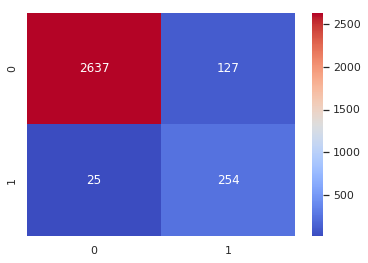

In [44]:
functions.eval_model(NN_gd_sr.best_estimator_, X_val, y_val)